# Lab - Week2

## Questions:

1. When do the first and last flights leave each day?

1. When there is a missing value in dep_time then this is an indication of canceled flight. Find the number of cancelled flights for each (carrier, origin) combination.

1. Which carrier has the worst dep_delays?

1. Which plane (tailnum) has the worst on-time record?

1. For each plane, count the number of flights before the first delay of greater than 1 hour.

1. By using the flights data find all flights:

1. Had an arrival delay of two or more hours.

1. Flew to Houston (IAH or HOU)

1. Were operated by American, Delta

1. How many values are missing in dep_time?

1. Sort flight to find fastest flight.

1. Which flights travelled the shortest?

1. Merge `flights` dataframe with `weather` dataframe and investigate if weather has any affect on delays

In [3]:
import pandas as pd

flights = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv')

weather = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/relational_data/nyc_weather.csv')

# example merge:
# flights.merge(weather, on= ['year', 'month', 'day', 'hour', 'origin'])

In [4]:
flights.head()
#flights.info()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [5]:
weather.head(10)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
5,EWR,2013,1,1,6,37.94,28.04,67.21,240.0,11.50780,NaN,0.0,1012.4,10.0,2013-01-01T11:00:00Z
6,EWR,2013,1,1,7,39.02,28.04,64.43,240.0,14.96014,NaN,0.0,1012.2,10.0,2013-01-01T12:00:00Z
7,EWR,2013,1,1,8,39.92,28.04,62.21,250.0,10.35702,NaN,0.0,1012.2,10.0,2013-01-01T13:00:00Z
8,EWR,2013,1,1,9,39.92,28.04,62.21,260.0,14.96014,NaN,0.0,1012.7,10.0,2013-01-01T14:00:00Z
9,EWR,2013,1,1,10,41.00,28.04,59.65,260.0,13.80936,NaN,0.0,1012.4,10.0,2013-01-01T15:00:00Z


In [6]:
flights.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [7]:
flights['time_hour'] = pd.to_datetime(flights['time_hour'])
flights['date'] = flights['time_hour'].dt.date
flights['time'] = flights['time_hour'].dt.time


In [75]:
#1When do the first and last flights leave each day?
first_and_last = flights.groupby('date').agg(min_time=('time', 'min'), max_time=('time', 'max')).reset_index()
first_and_last.columns = ['date', 'min', 'max']
first_and_last

,date,min,max
0,2013-01-01,10:00:00,23:00:00
1,2013-01-02,00:00:00,23:00:00
2,2013-01-03,00:00:00,23:00:00
3,2013-01-04,00:00:00,23:00:00
4,2013-01-05,00:00:00,23:00:00
...,...,...,...
361,2013-12-28,00:00:00,23:00:00
362,2013-12-29,00:00:00,23:00:00
363,2013-12-30,00:00:00,23:00:00
364,2013-12-31,00:00:00,23:00:00


In [76]:
#finding missing values
def cancelled_flights(series):
    return series.isnull().sum()


In [77]:
#When there is a missing value in dep_time then this is an indication of canceled flight. Find the number of cancelled flights for each (carrier, origin) combination.
null_counts_carrier = flights.groupby('carrier')['dep_time'].apply(count_null_values)
null_counts_origin = flights.groupby('origin')['dep_time'].apply(count_null_values)

print("Null counts by carrier:")
print(null_counts_carrier)

print("Null counts by origin:")
print(null_counts_origin)

Null counts by carrier:
carrier
9E    1044
AA     636
AS       2
B6     466
DL     349
EV    2817
F9       3
FL      73
HA       0
MQ    1234
OO       3
UA     686
US     663
VX      31
WN     192
YV      56
Name: dep_time, dtype: int64
Null counts by origin:
origin
EWR    3239
JFK    1863
LGA    3153
Name: dep_time, dtype: int64


In [78]:
#3Which carrier has the worst dep_delays?
max_mean_carrier = flights.groupby('carrier')['dep_delay'].mean().idxmax()
max_mean_carrier

'F9'

In [25]:

null_count_carrier = flights.groupby('carrier')['dep_time'].apply(lambda x: x.isnull().sum())
null_count_origin = flights.groupby('origin')['dep_time'].apply(lambda x: x.isnull().sum())
print("Null counts per carrier:")
print(null_count_carrier)
print("\nNull counts per origin:")
print(null_count_origin)
max_delay_carrier = flights.groupby('carrier')['dep_delay'].max().idxmax()
max_delay_carrier


Null counts per carrier:
carrier
9E    1044
AA     636
AS       2
B6     466
DL     349
EV    2817
F9       3
FL      73
HA       0
MQ    1234
OO       3
UA     686
US     663
VX      31
WN     192
YV      56
Name: dep_time, dtype: int64

Null counts per origin:
origin
EWR    3239
JFK    1863
LGA    3153
Name: dep_time, dtype: int64


'HA'

In [79]:
 # Calculate the difference between scheduled arrival time and actual arrival time
flights['on-time'] = flights['sched_arr_time'] - flights['arr_time']
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,date,time,on-time,speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00,2013-01-01,10:00:00,-11.0,266.666667
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00,2013-01-01,10:00:00,-20.0,258.237082
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00,2013-01-01,10:00:00,-73.0,192.176471
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00,2013-01-01,10:00:00,18.0,274.086957
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00,2013-01-01,11:00:00,25.0,127.000000


In [80]:
#4
max_on_time_tailnum = flights.groupby('tailnum')['on-time'].max().idxmax()
max_on_time_tailnum

'N14168'

In [81]:
#5
import itertools
def prefix_sum_count(lst):
    target_sum = 60
    count = sum(1 for _ in itertools.takewhile(lambda x: x < target_sum, itertools.accumulate(lst)))
    return count
delay_counts = flights.groupby('tailnum')['dep_delay'].apply(lambda x: prefix_sum_count(x.tolist()))
delay_counts

tailnum
D942DN     0
N0EGMQ    31
N10156     2
N102UW    33
N103US    46
          ..
N997DL    12
N998AT    11
N998DL     2
N999DN    19
N9EAMQ    26
Name: dep_delay, Length: 4043, dtype: int64

In [82]:
#6
unique_flights = flights['tailnum'].unique()
unique_flights

array(['N14228', 'N24211', 'N619AA', ..., 'N776SK', 'N785SK', 'N557AS'],
      dtype=object)

In [83]:
#7
def count_delays_exceeding_two_hours(delay_list):
    target_sum = 120
    count = sum(1 for delay in delay_list if delay >= target_sum)
    return count

delay_counts = flights.groupby('tailnum')['arr_delay'].apply(count_delays_exceeding_two_hours)
delay_counts

tailnum
D942DN     0
N0EGMQ    10
N10156     6
N102UW     2
N103US     0
          ..
N997DL     1
N998AT     3
N998DL     3
N999DN     6
N9EAMQ     5
Name: arr_delay, Length: 4043, dtype: int64

In [84]:
#8
FLGT1 = flights[flights['dest'].isin(['IAH', 'HOU'])]
num_flights_to_houston = len(FLGT1)
num_flights_to_houston

9313

In [85]:
#9
FLGT1 = flights[(flights['carrier'] == 'AA') | (flights['carrier'] == 'DL')]
num_flights_operated_by_AA_DL = len(FLGT1)
num_flights_operated_by_AA_DL

80839

In [37]:
#10
dep_time_count = pd.isna(flights['dep_time']).sum()
dep_time_count

8255

In [86]:
#11
flights['speed'] = flights['distance'] / ((flights['hour'] + (flights['minute'] / 60)))
sorted_flights = flights.sort_values(by='speed')
sorted_flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,date,time,on-time,speed
19088,2013,1,22,2203.0,2130,33.0,2317.0,2225,52.0,EV,...,PHL,31.0,80,21,30,2013-01-23 02:00:00+00:00,2013-01-23,02:00:00,-92.0,3.720930
13068,2013,1,15,2122.0,2130,-8.0,2207.0,2225,-18.0,EV,...,PHL,26.0,80,21,30,2013-01-16 02:00:00+00:00,2013-01-16,02:00:00,18.0,3.720930
25145,2013,1,29,2131.0,2130,1.0,2221.0,2225,-4.0,EV,...,PHL,25.0,80,21,30,2013-01-30 02:00:00+00:00,2013-01-30,02:00:00,4.0,3.720930
6972,2013,1,8,2127.0,2130,-3.0,2304.0,2225,39.0,EV,...,PHL,30.0,80,21,30,2013-01-09 02:00:00+00:00,2013-01-09,02:00:00,-79.0,3.720930
115505,2013,2,5,2136.0,2130,6.0,2238.0,2225,13.0,EV,...,PHL,31.0,80,21,30,2013-02-06 02:00:00+00:00,2013-02-06,02:00:00,-13.0,3.720930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,2013,1,4,900.0,900,0.0,1516.0,1530,-14.0,HA,...,HNL,639.0,4983,9,0,2013-01-04 14:00:00+00:00,2013-01-04,14:00:00,14.0,553.666667
22030,2013,1,26,901.0,900,1.0,1536.0,1530,6.0,HA,...,HNL,660.0,4983,9,0,2013-01-26 14:00:00+00:00,2013-01-26,14:00:00,-6.0,553.666667
137412,2013,3,2,925.0,900,25.0,1526.0,1540,-14.0,HA,...,HNL,639.0,4983,9,0,2013-03-02 14:00:00+00:00,2013-03-02,14:00:00,14.0,553.666667
138148,2013,3,3,901.0,900,1.0,1519.0,1540,-21.0,HA,...,HNL,654.0,4983,9,0,2013-03-03 14:00:00+00:00,2013-03-03,14:00:00,21.0,553.666667


In [87]:
#12
shortest = flights.sort_values(by='distance')
shortest.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,date,time,on-time,speed
275945,2013,7,27,NaN,106,NaN,NaN,245,NaN,US,...,LGA,NaN,17,1,6,2013-07-27 05:00:00+00:00,2013-07-27,05:00:00,NaN,15.454545
3083,2013,1,4,1240.0,1200,40.0,1333.0,1306,27.0,EV,...,PHL,30.0,80,12,0,2013-01-04 17:00:00+00:00,2013-01-04,17:00:00,-27.0,6.666667
16328,2013,1,19,1617.0,1617,0.0,1722.0,1722,0.0,EV,...,PHL,34.0,80,16,17,2013-01-19 21:00:00+00:00,2013-01-19,21:00:00,0.0,4.912999
112178,2013,2,1,2128.0,2129,-1.0,2216.0,2224,-8.0,EV,...,PHL,24.0,80,21,29,2013-02-02 02:00:00+00:00,2013-02-02,02:00:00,8.0,3.723817
19983,2013,1,23,2128.0,2129,-1.0,2221.0,2224,-3.0,EV,...,PHL,23.0,80,21,29,2013-01-24 02:00:00+00:00,2013-01-24,02:00:00,3.0,3.723817


In [88]:
#13
flight=flights.merge(weather, on= ['year', 'month', 'day', 'hour', 'origin'])

In [89]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


In [90]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,date,time,on-time,speed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00,2013-01-01,10:00:00,-11.0,266.666667
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00,2013-01-01,10:00:00,-20.0,258.237082
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00,2013-01-01,10:00:00,-73.0,192.176471
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00,2013-01-01,10:00:00,18.0,274.086957
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00,2013-01-01,11:00:00,25.0,127.000000


In [66]:
import numpy as np
conditions = [
    (flight['precip'] > 0),
    ((flight['temp'] > 25) & (flight['humid'] > 70)),
    ((flight['temp'] > 25) & (flight['wind_speed'] > 10)),
    (flight['temp'] < 5),
    (flight['wind_gust'] > 30),
    (flight['pressure'] < 1000)
]

choices = ['Rainy', 'Hot and Humid', 'Windy', 'Cold', 'Stormy', 'Low Pressure']
flight['weather_condition'] = np.select(conditions, choices, default='Normal')
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y,weather_condition
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z,Windy
1,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z,Windy
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01T10:00:00Z,Windy
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01T10:00:00Z,Windy
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01T10:00:00Z,Windy


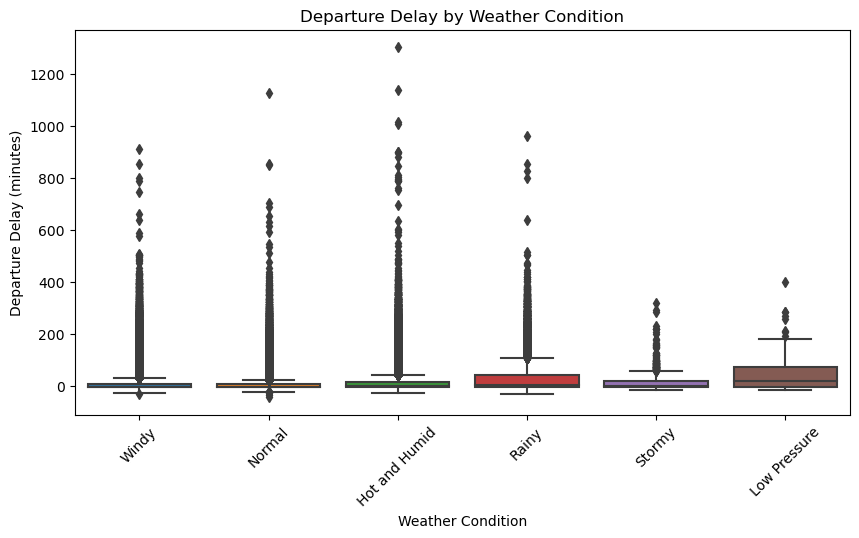

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='weather_condition', y='dep_delay', data=flight)
plt.title('Departure Delay by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.show()